Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
Number of photos: 2527


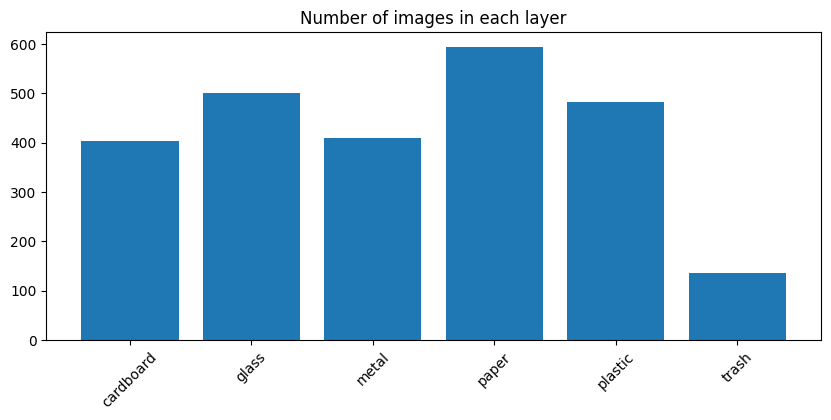

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np


import tensorflow as tf
from tensorflow.keras import layers, models

# Set the DATA_PATH to the specified Google Drive location
DATA_PATH = '/content/drive/MyDrive/Garbage classification'

folders = sorted(os.listdir(DATA_PATH))
print("Classes:", folders)


# Plot number of photos per layer
counts = [len(os.listdir(os.path.join(DATA_PATH, f))) for f in folders]
print("Number of photos:", sum(counts))
plt.figure(figsize=(10,4))
plt.bar(folders, counts)
plt.title("Number of images in each layer")
plt.xticks(rotation=45)
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


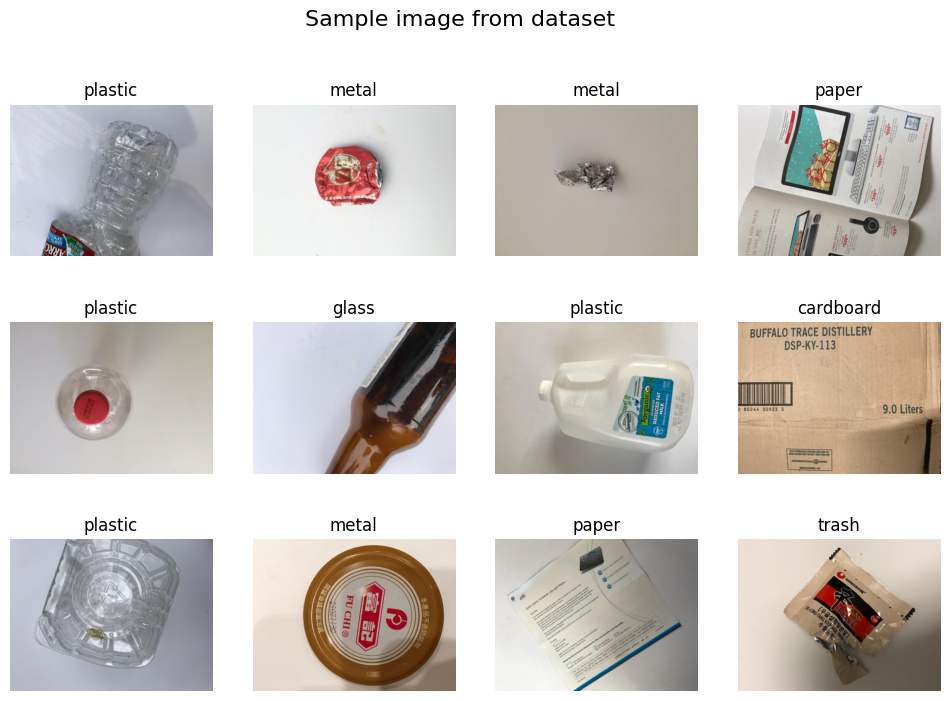

In [3]:
import random
import cv2

plt.figure(figsize=(12,8))

for i in range(12):
    cls = random.choice(folders)
    img_name = random.choice(os.listdir(os.path.join(DATA_PATH, cls)))

    img = cv2.imread(os.path.join(DATA_PATH, cls, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(3,4,i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.suptitle("Sample image from dataset", fontsize=16)
plt.show()


# **DATA AUGMENTATION**

In [4]:


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



IMG_SIZE = (256, 256)
BATCH_SIZE = 16

# Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    DATA_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    DATA_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [5]:
# Get a batch of images
imgs, labels = next(train_generator)

# Select the correct image to display augmentation
original_image = imgs[0]

# Create 8 augmented images from the original image
aug_images = []
for i in range(8):
    aug_img = train_datagen.random_transform(original_image)
    aug_images.append(aug_img)



<Figure size 1200x600 with 0 Axes>

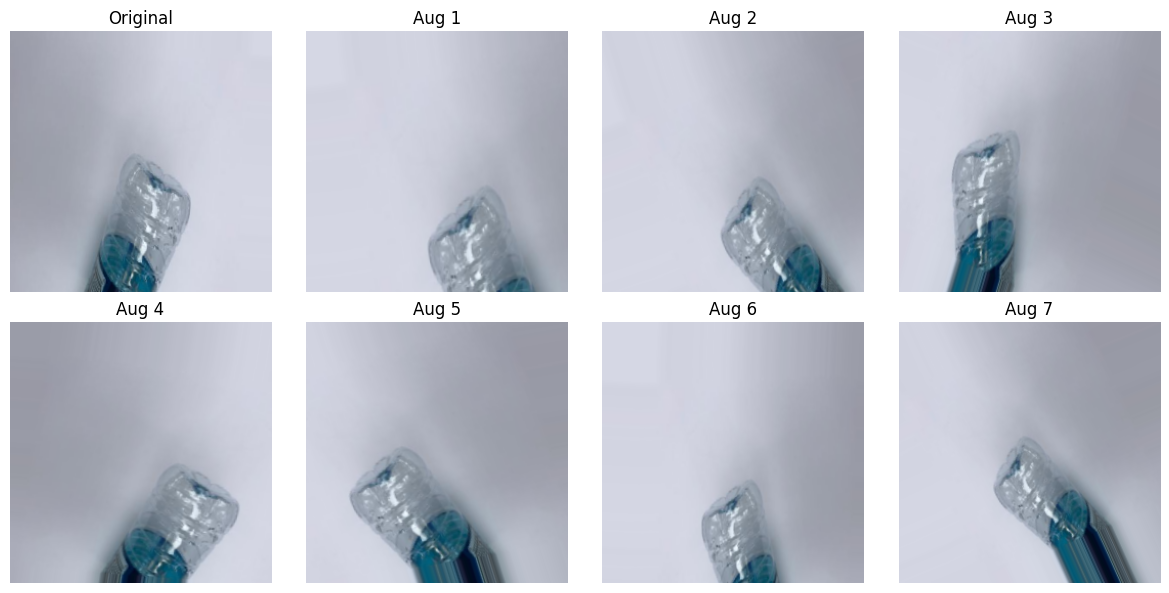

In [6]:
plt.figure(figsize=(12, 6))

plt.figure(figsize=(12, 6))

# Original photo
plt.subplot(2, 4, 1)
plt.imshow(original_image)
plt.title("Original")
plt.axis("off")
# Augmented images
for i in range(1,8):
    plt.subplot(2, 4, i+1)
    plt.imshow(aug_images[i])
    plt.title(f"Aug {i}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [7]:
def build_model(input_shape=(256,256,3), num_classes=6):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(2,2),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = build_model()
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,167,430 (65.49 MB)

 Trainable params: 17,167,430 (65.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=12,
    validation_data=val_generator
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2980 - loss: 1.7683

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(["Train", "Val"])
plt.show()

In [ ]:
# --- Get a sample image from val_generator ---
sample_img, _ = next(val_generator)
sample_img = sample_img[0]      # first photo
plt.imshow(sample_img)
plt.title("Input image")
plt.axis("off")
plt.show()


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

inputs = Input(shape=(256, 256, 3))

x = Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = MaxPooling2D(2)(x)

x = Conv2D(64, 3, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(128, 3, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(256, 3, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(6, activation='softmax')(x)

functional_model = Model(inputs, outputs)
functional_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])


In [ ]:
functional_model.set_weights(model.get_weights())


In [ ]:
conv_layers = [layer for layer in functional_model.layers if isinstance(layer, tf.keras.layers.Conv2D)]
layer_outputs = [layer.output for layer in conv_layers]

activation_model = Model(inputs=functional_model.input, outputs=layer_outputs)


In [ ]:
activations = activation_model.predict(sample_img[np.newaxis, ...])


In [ ]:
def display_activation_maps(activation, layer_name, num_cols=8):
    num_features = min(activation.shape[-1], 32)
    size = activation.shape[1]
    num_rows = num_features // num_cols + 1

    fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 15))
    fig.suptitle(f"Feature Maps - {layer_name}", fontsize=18)

    for i in range(num_features):
        row = i // num_cols
        col = i % num_cols
        ax[row, col].imshow(activation[0, :, :, i], cmap='viridis')
        ax[row, col].axis('off')

    plt.show()


In [ ]:
for activation, layer in zip(activations, conv_layers):
    display_activation_maps(activation, layer.name)


In [ ]:
# Get mapping ID → class name
class_indices = train_generator.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}


# Get 1 batch from validation
images, true_labels = next(val_generator)

# Forecast
pred_probs = model.predict(images)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = np.argmax(true_labels, axis=1)

# Show 12 images
plt.figure(figsize=(14, 10))

for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    img = images[i]

    true_class = idx_to_class[true_labels[i]]
    pred_class = idx_to_class[pred_labels[i]]

    # Text color
    color = "green" if true_class == pred_class else "red"

    plt.imshow(img)
    plt.title(f"True: {true_class}\nPred: {pred_class}", color=color)
    plt.axis("off")

plt.suptitle("Prediction vs Ground Truth", fontsize=18)
plt.tight_layout()
plt.show()


In [ ]:
mis_images = []
mis_true = []
mis_pred = []

# Use 5 batches to find the incorrect image
for _ in range(5):
    imgs, labels = next(val_generator)
    preds = model.predict(imgs)

    true = np.argmax(labels, axis=1)
    pred = np.argmax(preds, axis=1)

    for i in range(len(true)):
        if true[i] != pred[i]:
            mis_images.append(imgs[i])
            mis_true.append(true[i])
            mis_pred.append(pred[i])

# Displaying 12 incorrect images
plt.figure(figsize=(14,10))
for i in range(min(12, len(mis_images))):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(mis_images[i])
    plt.title(f"True: {idx_to_class[mis_true[i]]}\nPred: {idx_to_class[mis_pred[i]]}", color="red")
    plt.axis("off")

plt.suptitle("Misclassified Images", fontsize=18)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Predict the entire validation
y_true = []
y_pred = []

val_generator.reset()
for i in range(len(val_generator)):
    imgs, labels = next(val_generator)
    preds = model.predict(imgs)

    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=list(idx_to_class.values()))
disp.plot(xticks_rotation=45, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
